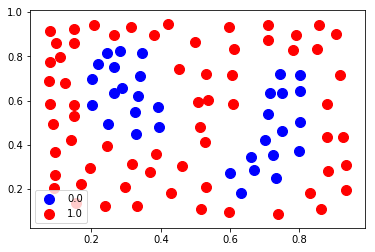

Accuracy: 0.9583333333333334


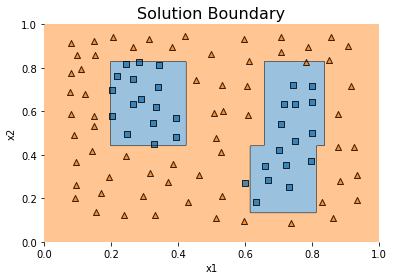

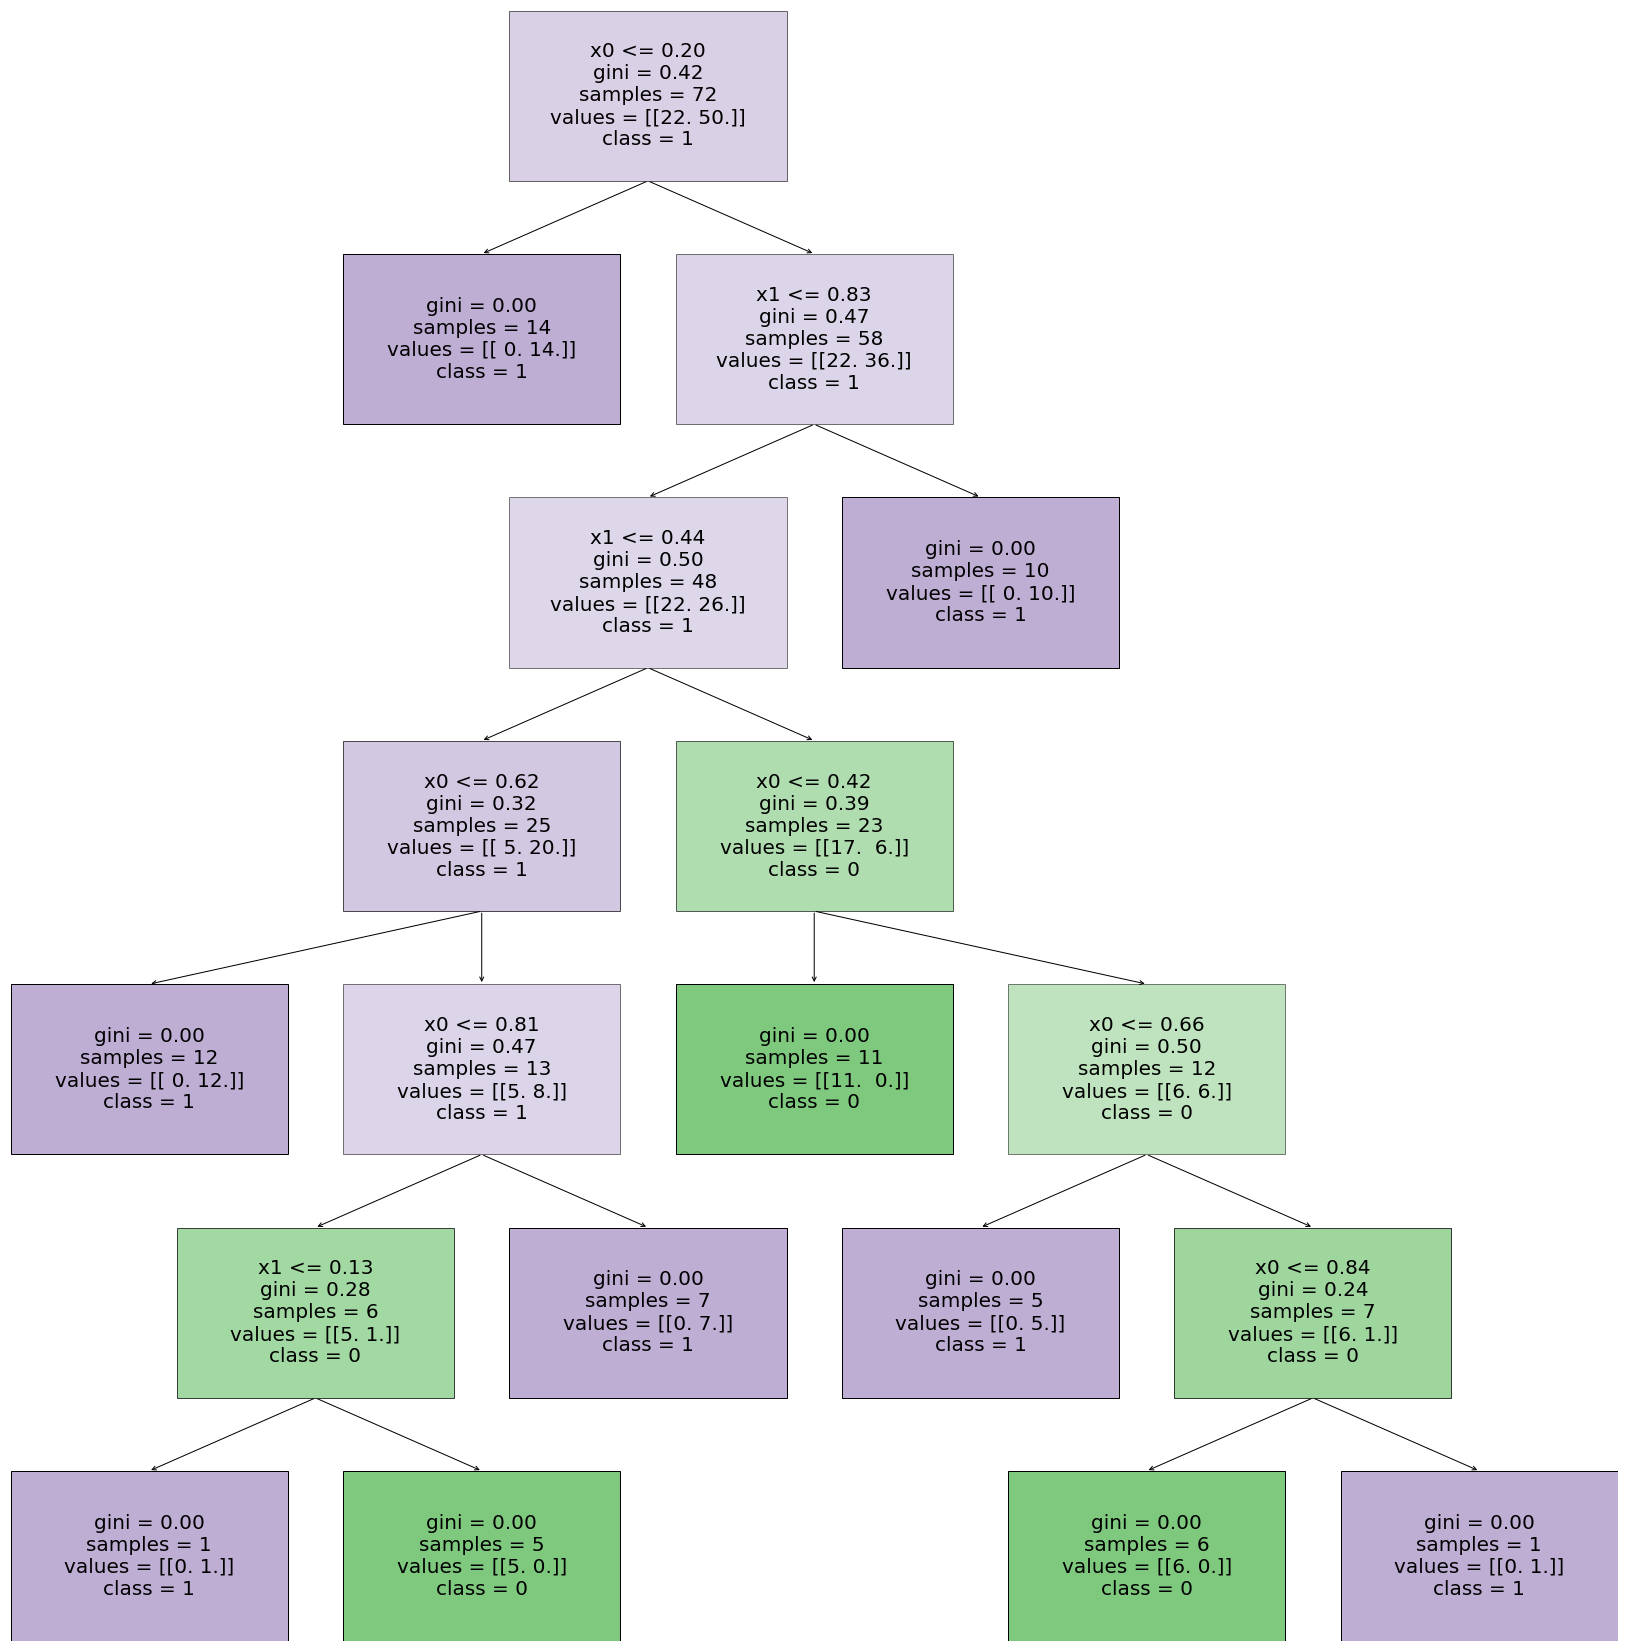

In [2]:
# =============================================================================
# # Import statements
# =============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
try:
    from sklearn.model_selection import train_test_split # runs in Spyder but gives error in Udacity workspace
except:
    from  sklearn.cross_validation import train_test_split # runs in Udacity workspace but throws error in Spyder. Maybe just needs installation

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# =============================================================================
# # READ IN THE DATA.
# =============================================================================
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y.
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data
# Use a test size of 25% and a random state of 42
# random state is like seed in R
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)




# =============================================================================
# PLOT DATA
# =============================================================================
#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option?noredirect=1&lq=1
scatter_x = data[:,0:1]
scatter_y = data[:,1:2]

group = data[:,2]
cdict = {1: 'red', 0: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()





# =============================================================================
# MODEL
# =============================================================================
# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model_fit = model.fit(X_train, y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)

print("Accuracy:",acc)


# =============================================================================
# PLOTTING DECISION REGION
# =============================================================================
#https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/


# Plot Decision Region using mlxtend's awesome plotting function
# pip install mlxtend
plot_decision_regions(X=X,
                      y=y.astype(np.integer),
                      clf=model,
                      legend=None,
                      #legend=2
                      zoom_factor=3.0)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Solution Boundary', size=16)

plt.show()





from dtreeplt import dtreeplt

dtree = dtreeplt(
    model=model,
    feature_names=['x0','x1'],
    target_names=[0,1] #I think order in the dataset doesn't matter, just in ascending order???
)
fig = dtree.view()
#if you want save figure, use savefig method in returned figure object.
fig.savefig('output_quiz.png')

# dtree.view(interactive=True)




